In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
path = "/content/drive/MyDrive/thesis_dataset_all"
os.listdir(path)

['training_set', 'test_set']

In [5]:
train_path = os.path.join(path, "training_set")
print(os.listdir(train_path))
print("*"*100)
test_path = os.path.join(path, "test_set")
print(os.listdir(test_path))

['ear mites', 'mange', 'Leprosy in dog', 'fungal infection', 'Leprosy in cat', 'dog ringworm']
****************************************************************************************************
['mange', 'Leprosy in dog', 'fungal infection', 'Leprosy in cat', 'ear mites', 'dog ringworm']


In [7]:
from glob import glob
folders = glob("/content/drive/MyDrive/thesis_dataset_all/training_set/*")

In [8]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [9]:
SIZE = [224, 224]

In [10]:
inception = InceptionV3(input_shape=SIZE + [3], weights="imagenet", include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [11]:
for layer in inception.layers:
    layer.trainable = False

In [12]:
x = Flatten()(inception.output)

In [13]:
prediction = Dense(len(folders), activation="softmax")(x)

In [14]:
model_inception = Model(inputs=inception.input, outputs=prediction)

In [15]:
model_inception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [16]:
model_inception.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [17]:
train_datagen_inception = ImageDataGenerator(rescale=1./255,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            horizontal_flip = True,
                                            rotation_range= 7)

test_datagen_inception = ImageDataGenerator(rescale=1./255)

In [18]:
trainning_set_inception = train_datagen_inception.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical", shuffle=True)

Found 594 images belonging to 6 classes.


In [19]:
testing_set_inception = test_datagen_inception.flow_from_directory(test_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical", shuffle=False)

Found 213 images belonging to 6 classes.


In [20]:
import tensorflow as tf

history = model_inception.fit_generator(trainning_set_inception,
                       validation_data=testing_set_inception,
                       epochs=2,
                       steps_per_epoch = len(trainning_set_inception),
                       validation_steps = len(testing_set_inception)                              
                       
                       )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/2
19/19 [==============================] - 201s 10s/step - loss: 11.9673 - accuracy: 0.4865 - val_loss: 10.1334 - val_accuracy: 0.5634
Epoch 2/2
19/19 [==============================] - 87s 5s/step - loss: 3.0626 - accuracy: 0.7593 - val_loss: 8.2983 - val_accuracy: 0.5822


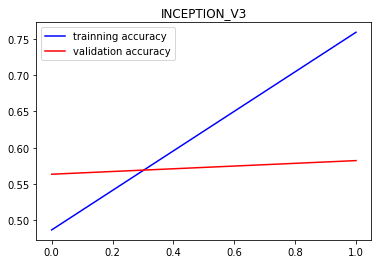

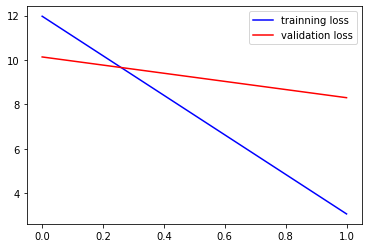

In [21]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.title("INCEPTION_V3")
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [22]:
y_pred = model_inception.predict(testing_set_inception)

In [23]:
y_pred

array([[3.9260723e-11, 1.6345606e-09, 1.7840717e-02, 9.8215932e-01,
        1.6063774e-19, 8.2727455e-26],
       [1.1837936e-11, 7.2333041e-13, 4.1459170e-13, 1.0000000e+00,
        2.1549053e-21, 1.3386326e-23],
       [1.2269831e-02, 7.2623901e-02, 1.9788768e-04, 3.5440487e-05,
        9.5429610e-12, 9.1487294e-01],
       ...,
       [1.9110389e-13, 3.8473709e-06, 9.9999619e-01, 3.6835849e-15,
        2.7279105e-08, 6.4479378e-18],
       [9.8579341e-01, 2.7098849e-05, 4.0327809e-06, 1.1691829e-05,
        6.7171212e-15, 1.4163767e-02],
       [9.8579341e-01, 2.7098848e-05, 4.0328041e-06, 1.1691829e-05,
        6.7171216e-15, 1.4163795e-02]], dtype=float32)

In [24]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 3, 5, 1, 0, 0, 0, 5, 5, 5, 3, 0, 2, 3, 0, 3, 3, 3, 3, 0, 2, 0,
       5, 1, 2, 2, 0, 1, 0, 3, 2, 0, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 3, 3, 3, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 2, 2, 1, 3, 3, 1, 3, 3,
       3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 1, 2,
       1, 2, 3, 3, 3, 2, 3, 3, 3, 1, 1, 1, 3, 4, 1, 2, 2, 1, 1, 0, 3, 1,
       2, 3, 2, 2, 2, 1, 2, 1, 3, 3, 2, 2, 2, 0, 0])

In [25]:
model_inception.save("inception.model")

INFO:tensorflow:Assets written to: inception.model/assets


In [29]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

model = tf.keras.models.load_model("inception.model")

In [30]:
class_dict = trainning_set_inception.class_indices
class_dict

{'Leprosy in cat': 0,
 'Leprosy in dog': 1,
 'dog ringworm': 2,
 'ear mites': 3,
 'fungal infection': 4,
 'mange': 5}

In [31]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction) == clss:
            return key

In [37]:
prediction = model.predict([prepare("/content/drive/MyDrive/thesis_dataset_all/test_set/Leprosy in dog/w (138).jpg")])
prediction_cls(prediction)

'Leprosy in dog'